In [1]:
%cd ../
%pwd

C:\Users\peppe\UNIBO\Deep Learning\lab\FoodRecognition\src


'C:\\Users\\peppe\\UNIBO\\Deep Learning\\lab\\FoodRecognition\\src'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils import segmentation_utils
import matplotlib.cm as cm

In [41]:
cat_names = ['water'
             , 'bread-white'
             , 'salad-leaf-salad-green'
             , 'tomato'
             , 'butter'
             , 'carrot'
             , 'coffee-with-caffeine'
             , 'rice'
             , 'egg'
             , 'mixed-vegetables'
             , 'wine-red'
             , 'apple'
             , 'jam'
             , 'potatoes-steamed'
             , 'banana'
             , 'cheese' ]

In [44]:
path_dir = "../data/train/"   # @param {type: "string"}

# load images and other info from annotations
coco = segmentation_utils.load_coco_dataset(path_dir)
img_ids, img_names, cat_names, cat_to_label = segmentation_utils.load_imgs(coco)

# compute the class weights
class_dist = segmentation_utils.get_class_dist(coco, cat_names)
class_weights = segmentation_utils.get_class_weights(class_dist)

loading annotations into memory...
Done (t=4.14s)
creating index...
index created!


In [45]:
print(cat_names)

['background', 'water', 'pear', 'egg', 'grapes', 'butter', 'bread-white', 'jam', 'bread-whole-wheat', 'apple', 'tea-green', 'white-coffee-with-caffeine', 'tea-black', 'mixed-salad-chopped-without-sauce', 'cheese', 'tomato-sauce', 'pasta-spaghetti', 'carrot', 'onion', 'beef-cut-into-stripes-only-meat', 'rice-noodles-vermicelli', 'salad-leaf-salad-green', 'bread-grain', 'espresso-with-caffeine', 'banana', 'mixed-vegetables', 'bread-wholemeal', 'savoury-puff-pastry', 'wine-white', 'dried-meat', 'fresh-cheese', 'red-radish', 'hard-cheese', 'ham-raw', 'bread-fruit', 'oil-vinegar-salad-dressing', 'tomato', 'cauliflower', 'potato-gnocchi', 'wine-red', 'sauce-cream', 'pasta-linguini-parpadelle-tagliatelle', 'french-beans', 'almonds', 'dark-chocolate', 'mandarine', 'semi-hard-cheese', 'croissant', 'sushi', 'berries', 'biscuits', 'thickened-cream-35', 'corn', 'celeriac', 'alfa-sprouts', 'chickpeas', 'leaf-spinach', 'rice', 'chocolate-cookies', 'pineapple', 'tart', 'coffee-with-caffeine', 'focacc

In [46]:
print(class_dist)

{0: 24120, 2578: 1835, 1157: 151, 2022: 626, 1198: 94, 2053: 1008, 1566: 1273, 2099: 502, 1554: 223, 1151: 504, 2530: 140, 2521: 274, 2534: 109, 1026: 374, 1311: 404, 2738: 290, 1505: 256, 1078: 893, 1116: 144, 1731: 41, 1453: 50, 1040: 1189, 1538: 102, 2504: 391, 1154: 412, 1022: 624, 1565: 901, 2895: 49, 2620: 333, 1853: 140, 1300: 52, 1074: 138, 1310: 315, 1893: 161, 1533: 48, 2747: 50, 1069: 1069, 1084: 116, 1009: 58, 2618: 545, 2730: 131, 1490: 75, 1058: 160, 1210: 159, 2131: 213, 1180: 138, 1308: 101, 1588: 144, 2944: 56, 1156: 64, 2388: 134, 1384: 81, 1108: 130, 1082: 53, 1126: 40, 1143: 92, 1032: 194, 1468: 659, 2413: 40, 1150: 54, 2350: 98, 2512: 876, 1587: 40, 633: 56, 2836: 96, 1560: 75, 1010: 450, 1482: 60, 1831: 38, 2934: 54, 3080: 171, 1670: 75, 1203: 54, 1013: 238, 1098: 72, 1024: 92, 1942: 35, 1007: 52, 5641: 139, 2952: 120, 1956: 119, 2634: 158, 1214: 68, 2939: 202, 1060: 138, 1889: 151, 2303: 147, 1520: 121, 2729: 39, 1469: 67, 3358: 44, 1065: 48, 1033: 98, 3532: 52, 

In [39]:
# run ofly for know the number of annotations
del class_dist[0]
cat_d = list(class_dist.values())
sum(cat_d)

[1835,
 626,
 1008,
 1273,
 502,
 504,
 404,
 893,
 1189,
 412,
 624,
 1069,
 545,
 659,
 876,
 450]

In [62]:
# sort class_distr
class_dist_sorted = dict(sorted(class_dist.items(), key=lambda x:x[1], reverse=True))
del class_dist_sorted[0] # remove background

# set data
labels = [cat_names[cat_to_label[cat_id]] for cat_id in class_dist_sorted.keys()]
data = list(class_dist_sorted.values())

In [63]:
data

[1835,
 1273,
 1189,
 1069,
 1008,
 901,
 893,
 876,
 659,
 626,
 624,
 545,
 504,
 502,
 450,
 412,
 404,
 391,
 382,
 374,
 353,
 333,
 315,
 296,
 290,
 280,
 275,
 274,
 261,
 256,
 244,
 238,
 231,
 230,
 223,
 213,
 202,
 200,
 198,
 194,
 194,
 185,
 183,
 180,
 177,
 173,
 171,
 164,
 163,
 162,
 161,
 160,
 159,
 159,
 158,
 152,
 151,
 151,
 147,
 144,
 144,
 140,
 140,
 139,
 139,
 139,
 139,
 138,
 138,
 138,
 138,
 136,
 134,
 134,
 132,
 131,
 131,
 131,
 130,
 130,
 129,
 127,
 126,
 124,
 121,
 121,
 120,
 120,
 120,
 120,
 119,
 118,
 117,
 116,
 116,
 111,
 109,
 107,
 106,
 104,
 103,
 102,
 102,
 101,
 101,
 101,
 100,
 98,
 98,
 98,
 97,
 96,
 96,
 96,
 96,
 94,
 94,
 92,
 92,
 91,
 91,
 91,
 91,
 88,
 87,
 87,
 87,
 85,
 85,
 85,
 84,
 84,
 83,
 82,
 82,
 81,
 80,
 80,
 80,
 79,
 78,
 78,
 77,
 77,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 74,
 74,
 73,
 72,
 72,
 72,
 71,
 69,
 69,
 69,
 68,
 68,
 68,
 67,
 67,
 67,
 66,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 63,
 63,
 61

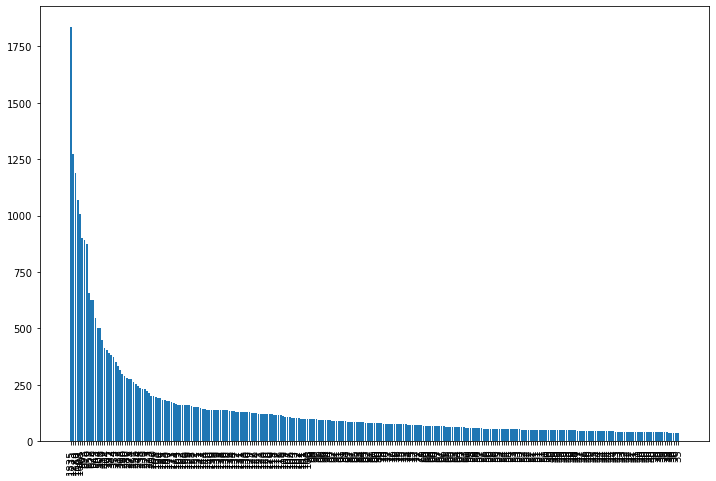

In [64]:
#colors
colors = cm.prism(np.linspace(0, 1, len(class_dist_sorted)))

# Creating plot
fig, ax = plt.subplots(figsize =(12, 8))
ax.bar(range(len(labels)), data)

# Rotation of the bars names
plt.xticks(range(len(labels)), data, rotation=90)

#ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.6) 
plt.show()

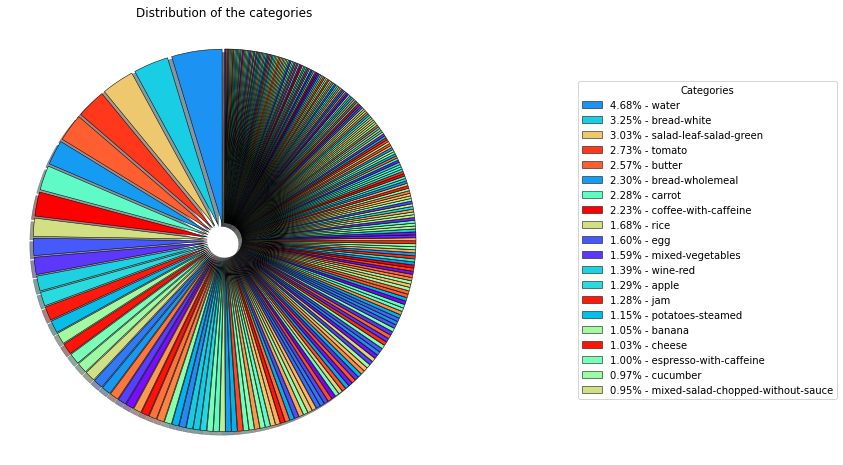

In [86]:
#colors
colors = cm.rainbow(np.linspace(0, 1, len(class_dist_sorted)))
np.random.shuffle(colors)

#explsion
explode = [0.1]*len(class_dist_sorted)
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
  

# Creating plot
fig, ax = plt.subplots(figsize =(12, 8))
wedges, texts = ax.pie(data, 
                                  #autopct='',
                                  pctdistance=0.9,
                                  explode = explode,
                                  #labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp
                                  )
labels_plt = ["{:.2f}% - {}".format(data[i]*100/sum(data), labels[i]) for i in range(20)]

# Adding legend
ax.legend(wedges, labels_plt,
          title ="Categories",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))
  
#plt.setp(autotexts, size = 8)
ax.set_title("Distribution of the categories")

# show plot
plt.show()